# Exploratory analysis
A brief exploratory analysis example. 

### Iris datasets
The exploratory analysis is done using iris dataset.

In [64]:
# DAL Library
# version 2.1

source("../dal_graphic.R")

loadlibrary("ggplot2")
loadlibrary("dplyr")
loadlibrary("reshape")
loadlibrary("RColorBrewer")

In [65]:
colors <- brewer.pal(4, 'Set1')
font <- theme(text = element_text(size=16))

## Part 1

In [66]:
loadlibrary("MASS")
data(iris)

In [67]:
head(iris[c(1:3,51:53,101:103),])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
51,7.0,3.2,4.7,1.4,versicolor
52,6.4,3.2,4.5,1.5,versicolor
53,6.9,3.1,4.9,1.5,versicolor


### Data Summary
A preliminary analysis using the $Sepal.Length$ attribute. 

This should be done for all attributes. 

In [68]:
sum <- summary(iris$Sepal.Length)
sum

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.300   5.100   5.800   5.843   6.400   7.900 

In [69]:
IQR <- sum["3rd Qu."]-sum["1st Qu."]
print(sprintf("IQR=%.1f", IQR))

[1] "IQR=1.3"


## Part 2

### Histogram analysis

Using  as id variables



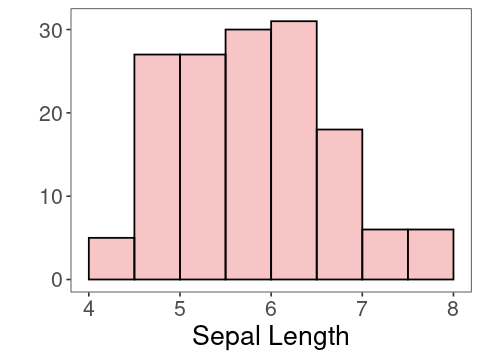

In [70]:
grf <- plot.hist(iris %>% dplyr::select(Sepal.Length), 
          label_x = "Sepal Length", color=colors[1]) + font

plot.size(4, 3)
plot(grf)

Grouping graphics

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables



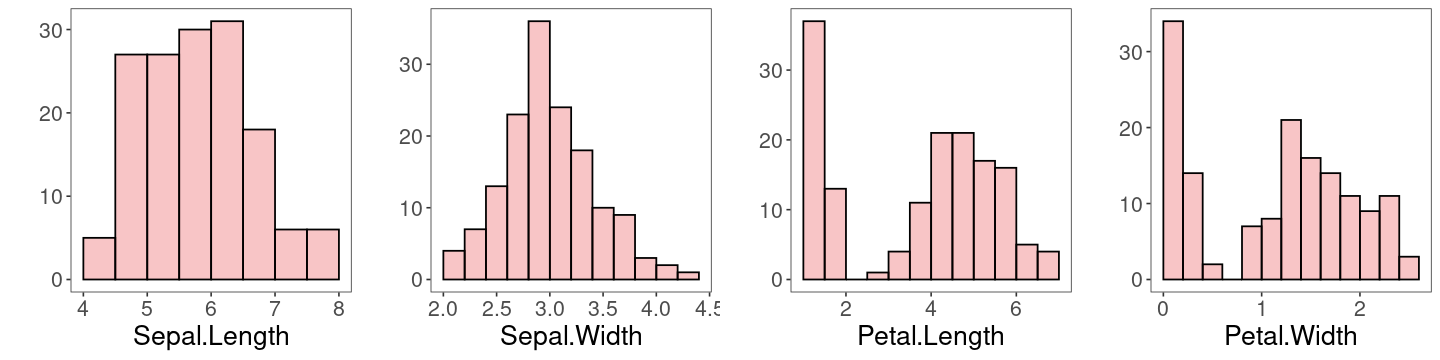

In [71]:
grf1 <- plot.hist(iris %>% dplyr::select(Sepal.Length), 
                  label_x = "Sepal.Length", color=colors[1]) + font
grf2 <- plot.hist(iris %>% dplyr::select(Sepal.Width), 
                  label_x = "Sepal.Width", color=colors[1]) + font  
grf3 <- plot.hist(iris %>% dplyr::select(Petal.Length), 
                  label_x = "Petal.Length", color=colors[1]) + font 
grf4 <- plot.hist(iris %>% dplyr::select(Petal.Width), 
                  label_x = "Petal.Width", color=colors[1]) + font

plot.size(12, 3)
loadlibrary("gridExtra") 
grid.arrange(grf1, grf2, grf3, grf4, ncol=4)

### Density distribution

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables



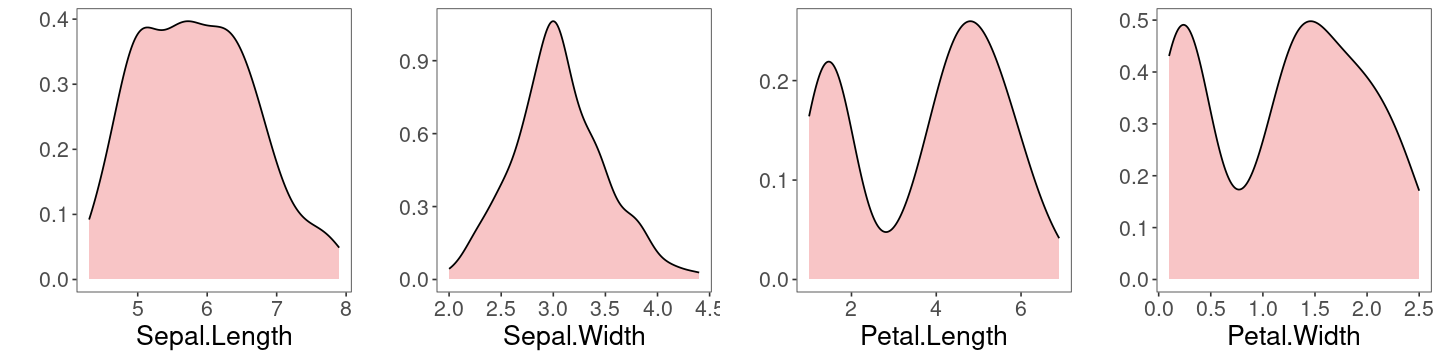

In [72]:
grf1 <- plot.density(iris %>% dplyr::select(Sepal.Length), 
                  label_x = "Sepal.Length", color=colors[1]) + font
grf2 <- plot.density(iris %>% dplyr::select(Sepal.Width), 
                  label_x = "Sepal.Width", color=colors[1]) + font  
grf3 <- plot.density(iris %>% dplyr::select(Petal.Length), 
                  label_x = "Petal.Length", color=colors[1]) + font 
grf4 <- plot.density(iris %>% dplyr::select(Petal.Width), 
                  label_x = "Petal.Width", color=colors[1]) + font

plot.size(12, 3)
grid.arrange(grf1, grf2, grf3, grf4, ncol=4)

### Box-plot analysis

Using Species as id variables



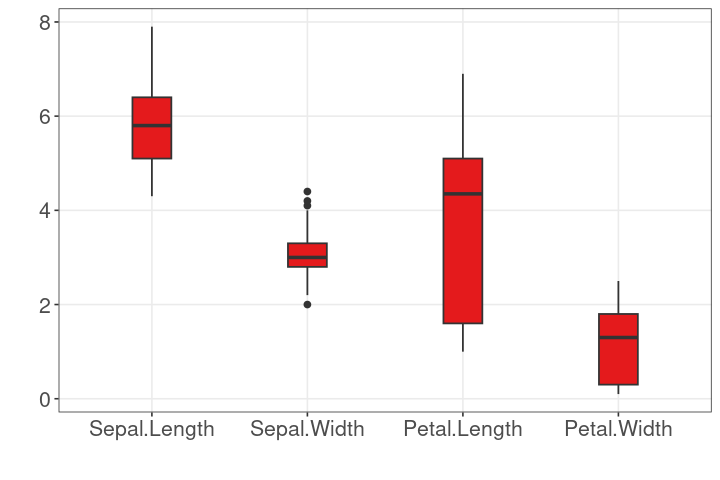

In [73]:
grf <- plot.boxplot(iris, colors=colors[1]) + font

plot.size(6, 4)
plot(grf)

### Consider the classification problem targeting to predict the species

### Density distribution colored by the classifier

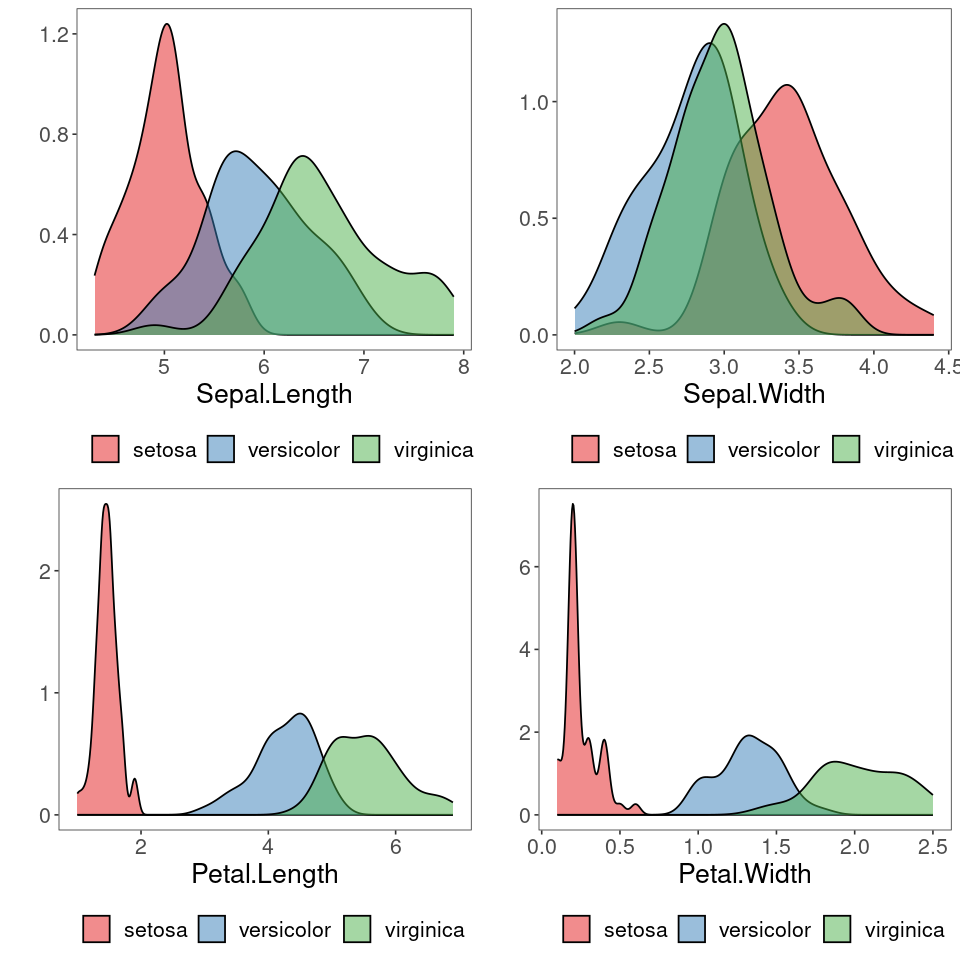

In [74]:
grfA <- plot.density.class(iris %>% dplyr::select(Species, Sepal.Length), 
            class_label="Species", label_x = "Sepal.Length", color=colors[c(1:3)]) + font
grfB <- plot.density.class(iris %>% dplyr::select(Species, Sepal.Width), 
            class_label="Species", label_x = "Sepal.Width", color=colors[c(1:3)]) + font
grfC <- plot.density.class(iris %>% dplyr::select(Species, Petal.Length), 
            class_label="Species", label_x = "Petal.Length", color=colors[c(1:3)]) + font
grfD <- plot.density.class(iris %>% dplyr::select(Species, Petal.Width), 
            class_label="Species", label_x = "Petal.Width", color=colors[c(1:3)]) + font

plot.size(8, 8)
grid.arrange(grfA, grfB, grfC, grfD, ncol=2, nrow=2)

### Box-plot analysis grouped by the classifier

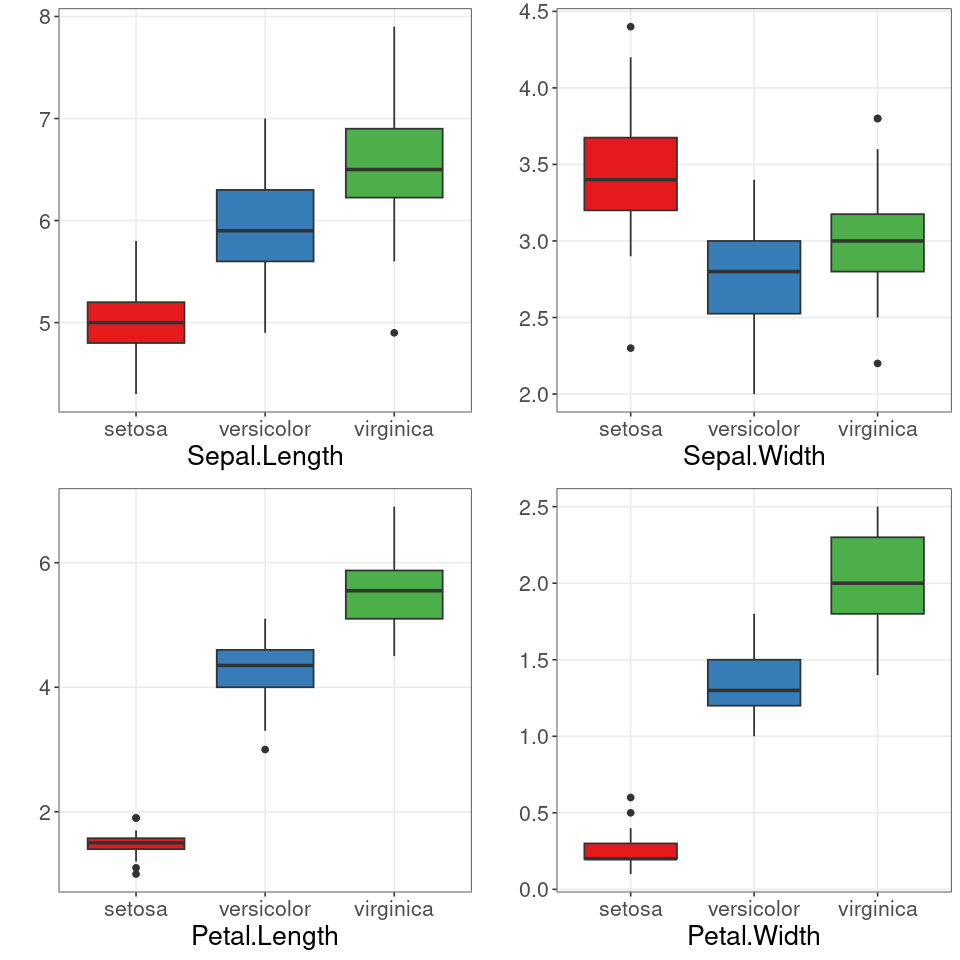

In [75]:
grfA <- plot.boxplot.class(iris %>% dplyr::select(Species, Sepal.Length), 
          class_label="Species", label_x = "Sepal.Length", color=colors[c(1:3)]) + font
grfB <- plot.boxplot.class(iris %>% dplyr::select(Species, Sepal.Width), 
          class_label="Species", label_x = "Sepal.Width", color=colors[c(1:3)]) + font
grfC <- plot.boxplot.class(iris %>% dplyr::select(Species, Petal.Length), 
          class_label="Species", label_x = "Petal.Length", color=colors[c(1:3)]) + font
grfD <- plot.boxplot.class(iris %>% dplyr::select(Species, Petal.Width), 
          class_label="Species", label_x = "Petal.Width", color=colors[c(1:3)]) + font

plot.size(8, 8)
grid.arrange(grfA, grfB, grfC, grfD, ncol=2, nrow=2)

## Part 3

### Scatter plot

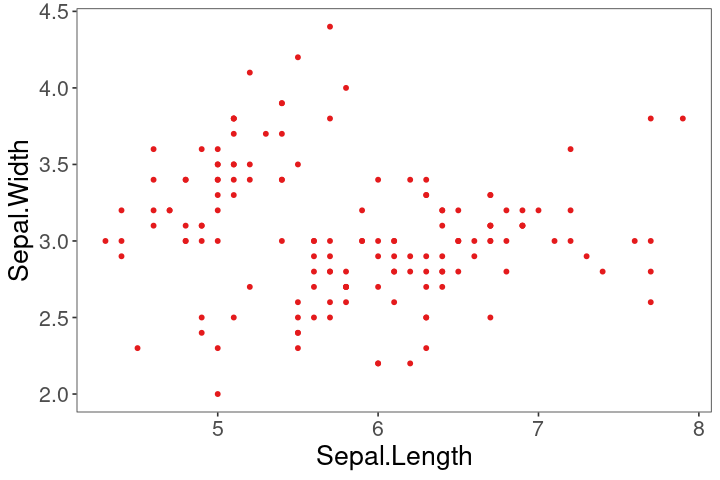

In [76]:
grf <- plot.scatter(iris |> dplyr::select(x=Sepal.Length, value=Sepal.Width) |> mutate(variable = "iris"), 
                    label_x = "Sepal.Length", 
                    label_y = "Sepal.Width", colors=colors[1]) +
                    theme(legend.position = "none") + font

plot.size(6, 4)
plot(grf)

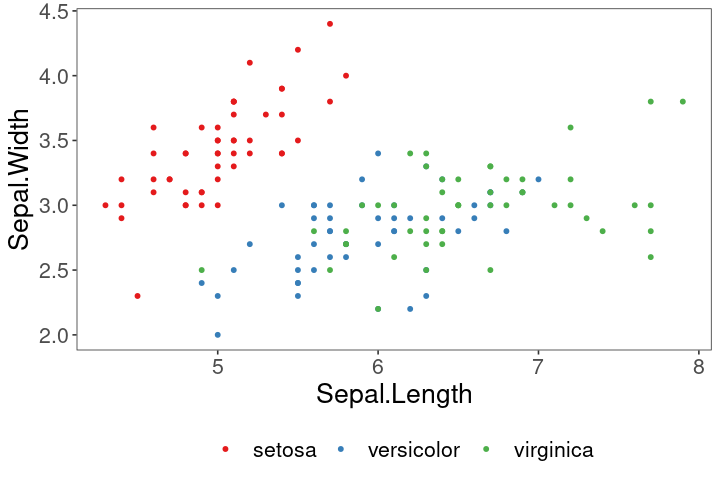

In [77]:
grf <- plot.scatter(iris |> dplyr::select(x = Sepal.Length, value = Sepal.Width, variable = Species), 
                    label_x = "Sepal.Length", label_y = "Sepal.Width", colors=colors[1:3]) + font

plot.size(6, 4)
plot(grf)

### Correlation matrix

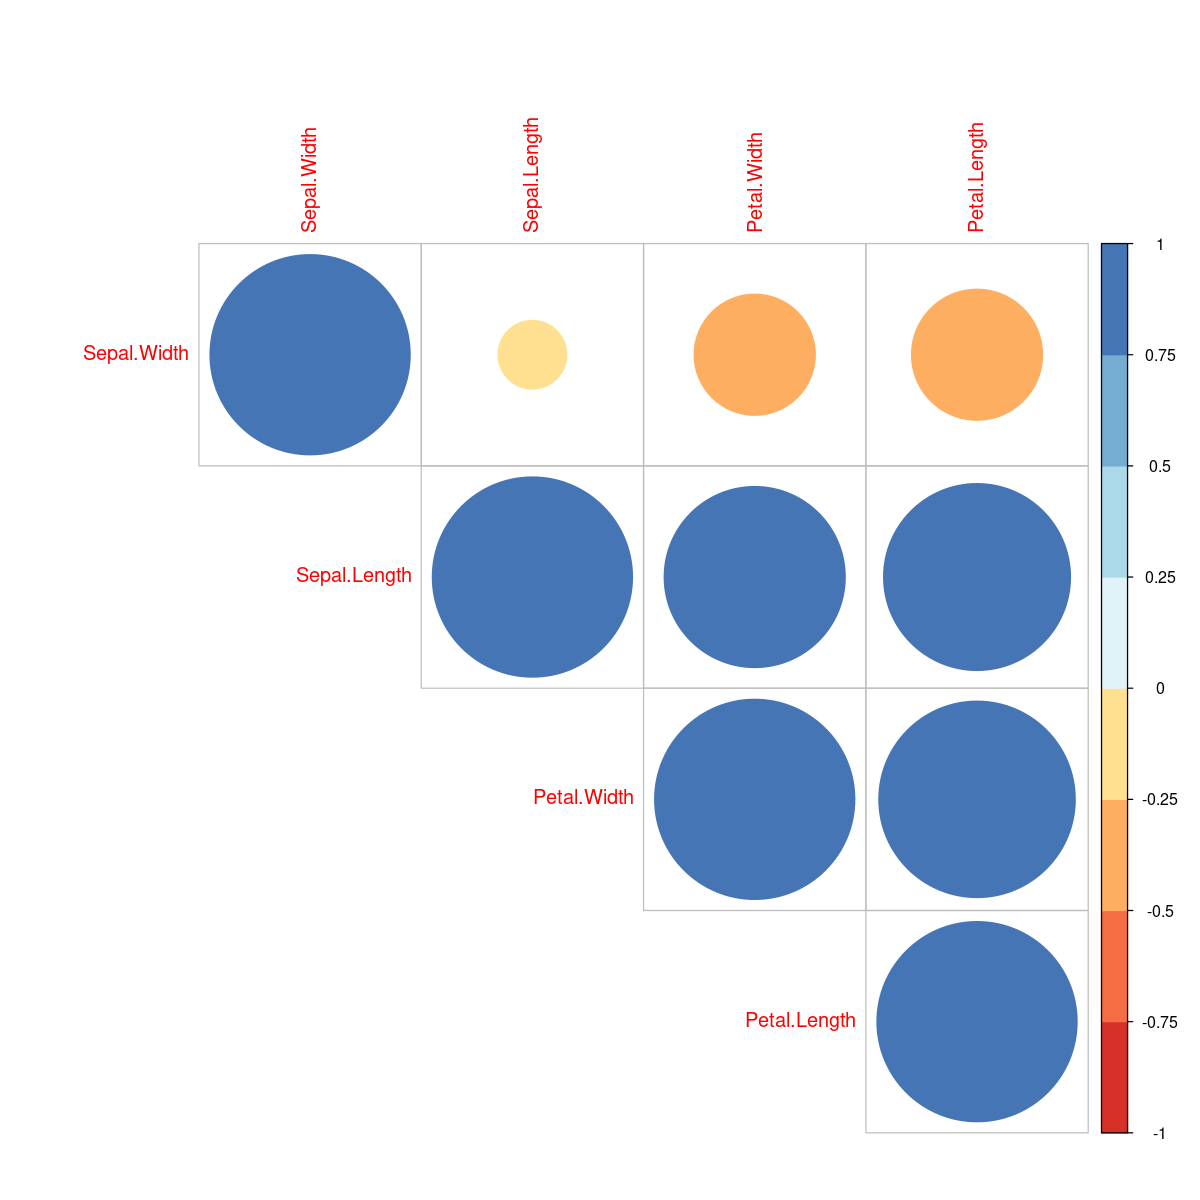

In [78]:
plot.size(10, 10)

plot.correlation(iris %>% 
                 dplyr::select(Sepal.Width, Sepal.Length, Petal.Width, Petal.Length))

## Matrix dispersion

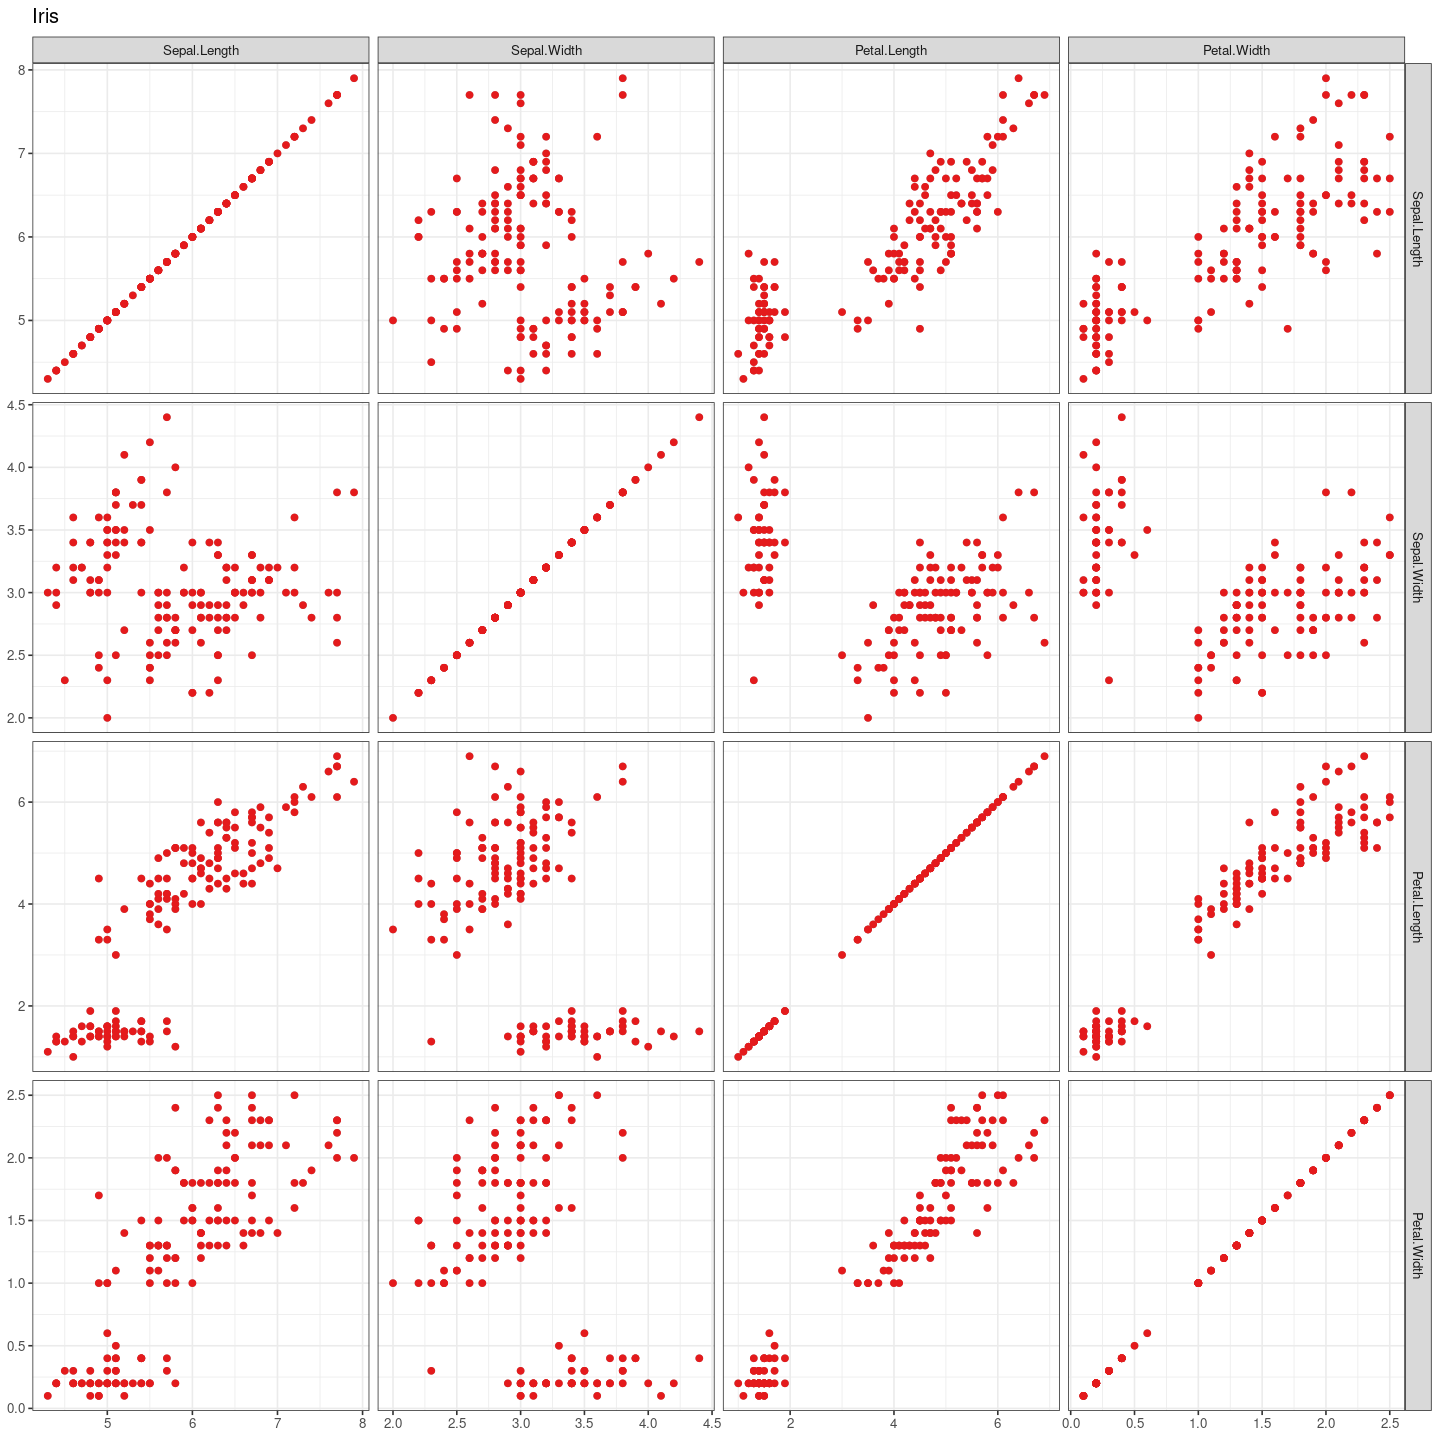

In [79]:
plot.size(12, 12)
grf <- plot.pair(data=iris, cnames=colnames(iris)[1:4], 
                 title="Iris", colors=colors[1])

grf


## Matrix dispersion by the classifier

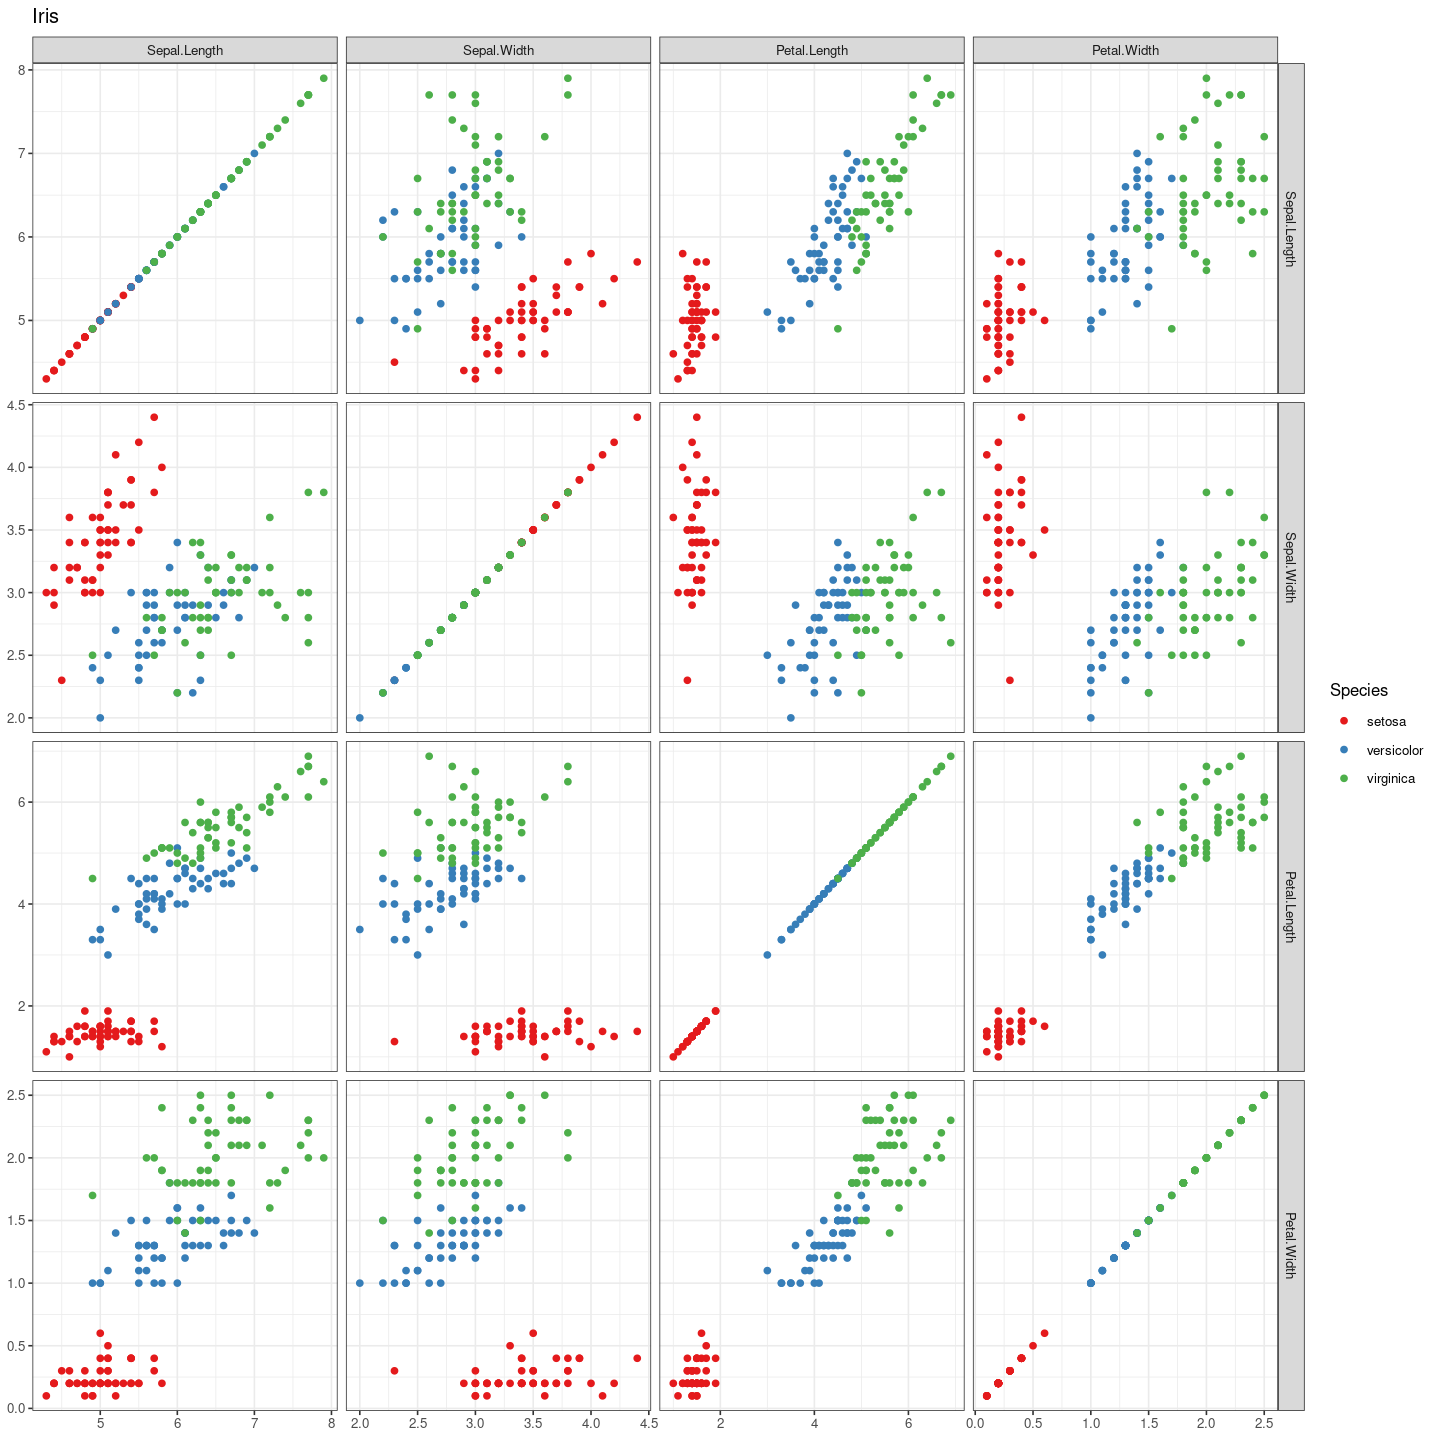

In [80]:
plot.size(12, 12)
grf <- plot.pair(data=iris, cnames=colnames(iris)[1:4], 
                 clabel='Species', title="Iris", colors=colors[1:3])
grf


## Advanced matrix dispersion

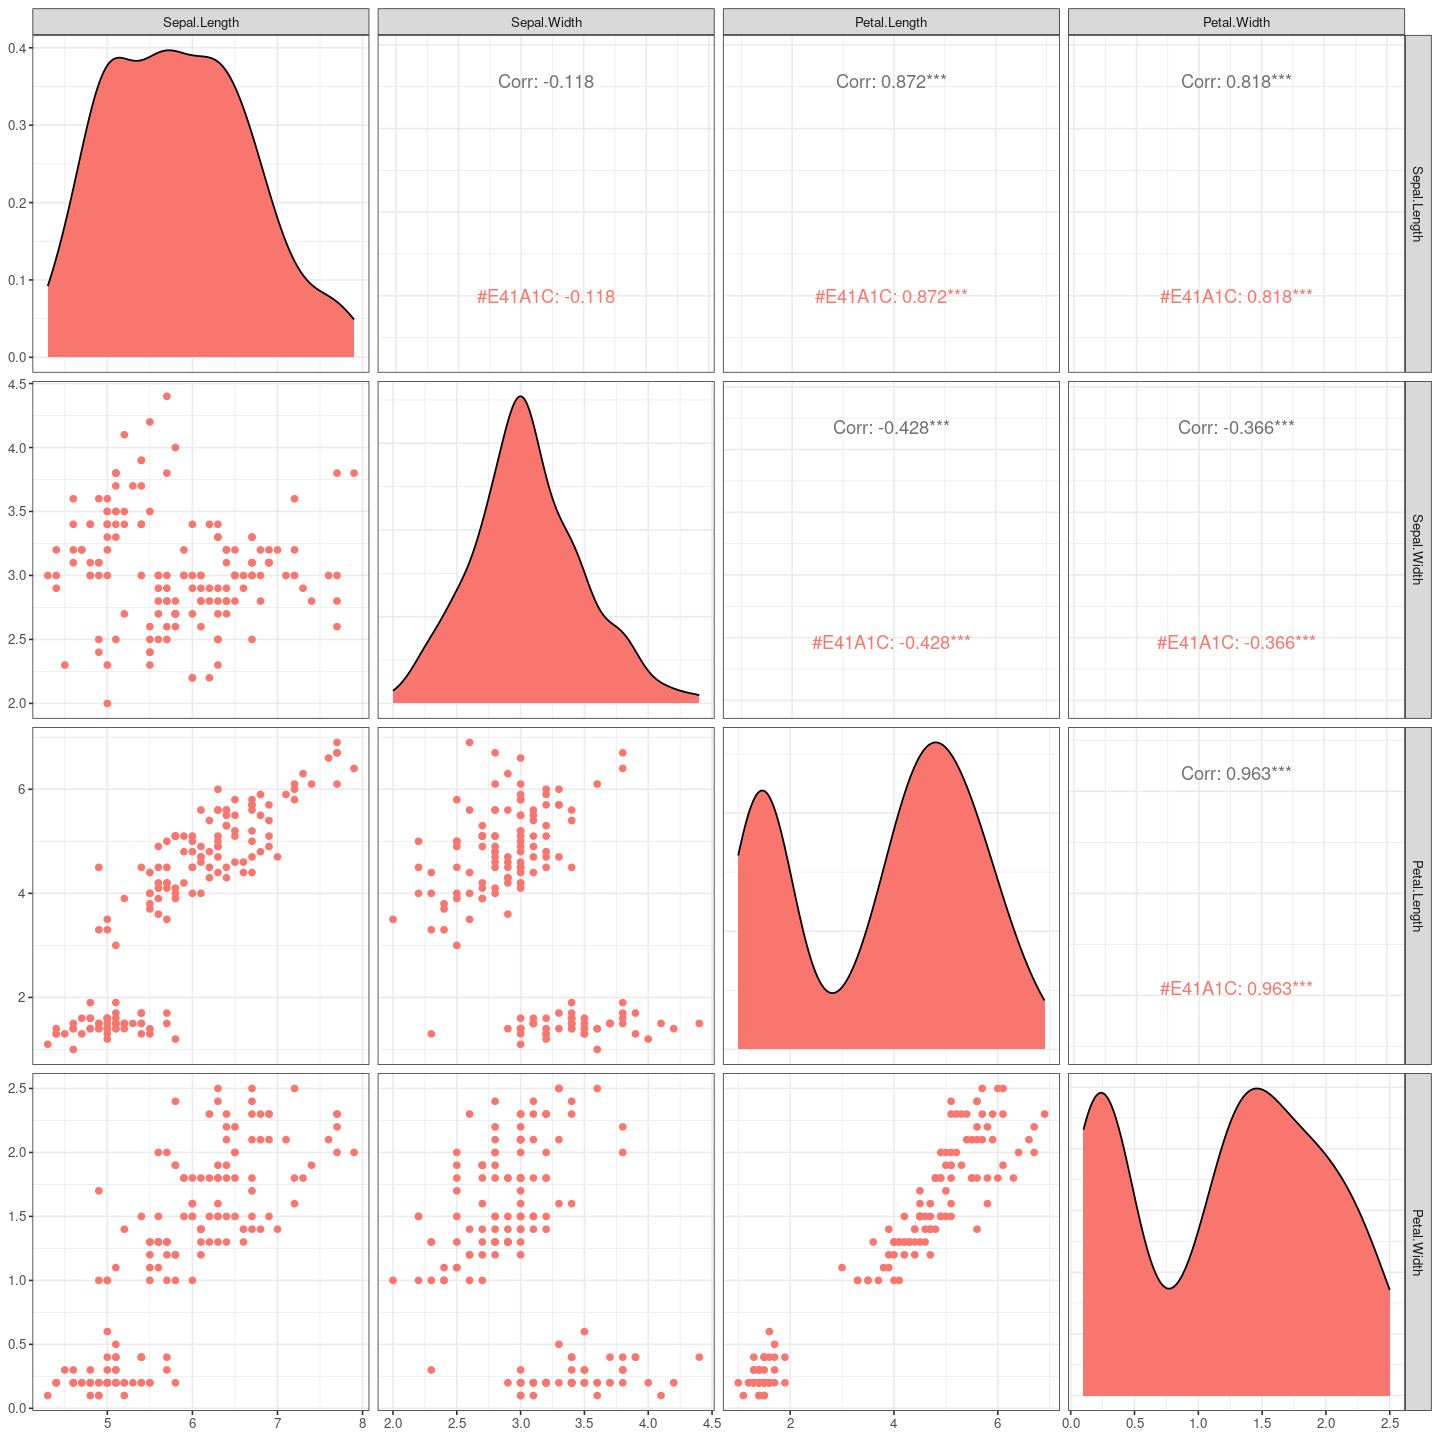

In [81]:
grf <- plot.pair.adv(data=iris, cnames=colnames(iris)[1:4], 
                     title="Iris", colors=colors[1])
grf

## Advanced matrix dispersion with the classifier

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


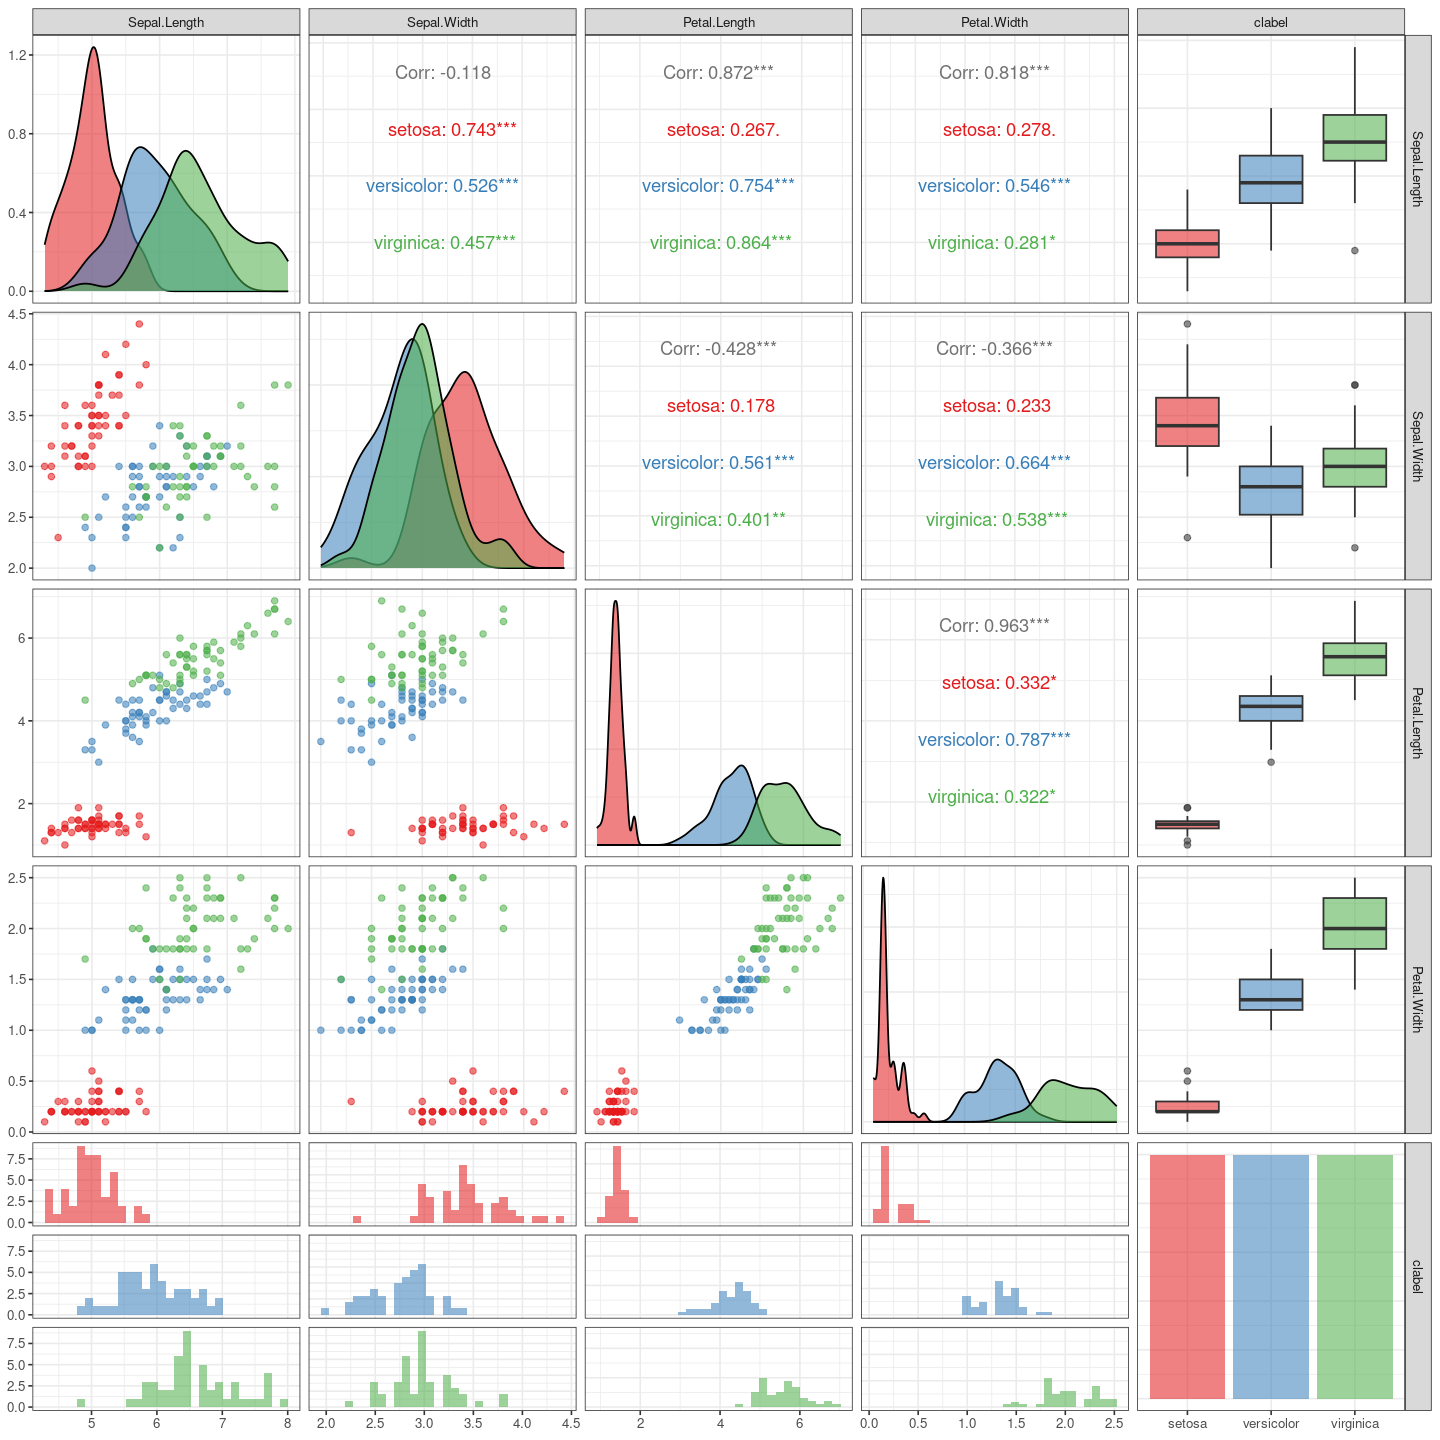

In [82]:
grf <- plot.pair.adv(data=iris, cnames=colnames(iris)[1:4], 
                        title="Iris", clabel='Species', colors=colors[1:3])
grf


## Parallel coordinates

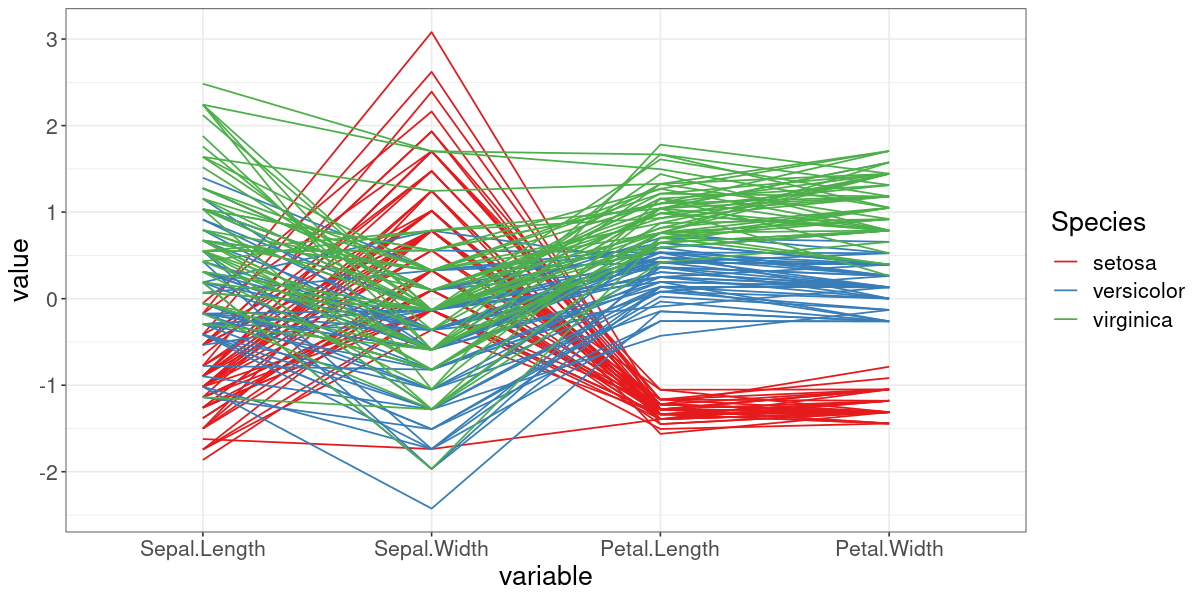

In [83]:
grf <- ggparcoord(data = iris, columns = c(1:4), group=5) + 
    theme_bw(base_size = 10) + scale_color_manual(values=colors[1:3]) + font

plot.size(10, 5)
plot(grf)

## Images

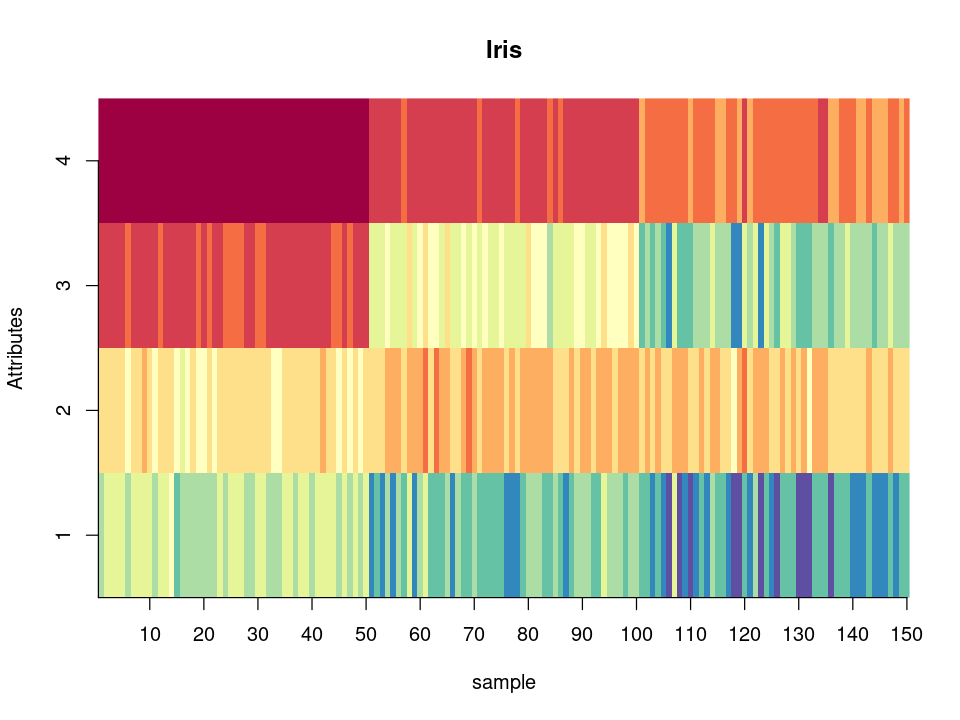

In [87]:
plot.size(8, 6)

mat <- as.matrix(iris[,1:4])
x <- (1:nrow(mat))
y <- (1:ncol(mat))
image(x, y, mat, col = brewer.pal(11, 'Spectral'), axes = FALSE,  
      main = "Iris", xlab="sample", ylab="Attributes")
axis(2, at = seq(0, ncol(mat), by = 1))
axis(1, at = seq(0, nrow(mat), by = 10))

## Chernoff faces

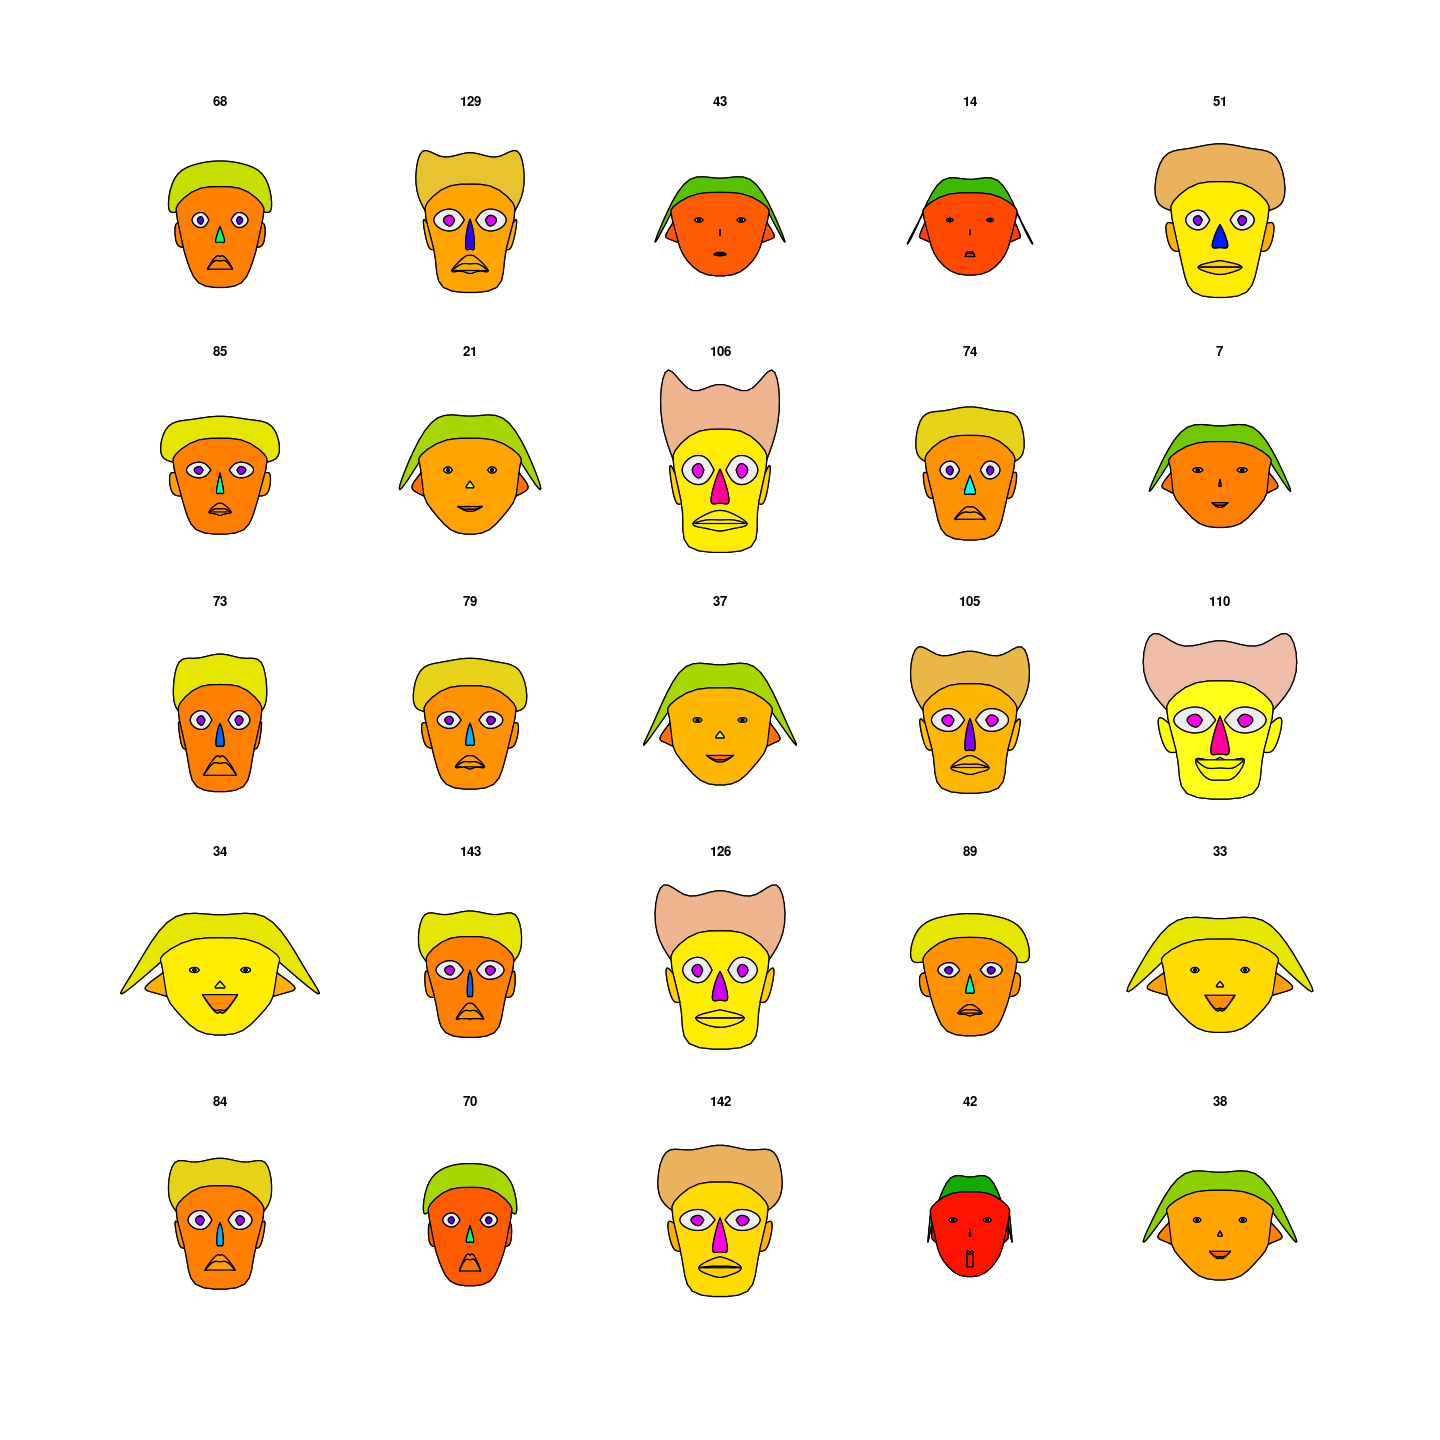

In [85]:
set.seed(1)
sample_rows = sample(1:nrow(iris), 25)

isample = iris[sample_rows,]
labels = as.character(rownames(isample))
isample$Species <- NULL

loadlibrary("aplpack")

plot.size(12, 12)
faces(isample, labels = labels, print.info=F, cex=1)

## Chernoff faces with the classifier

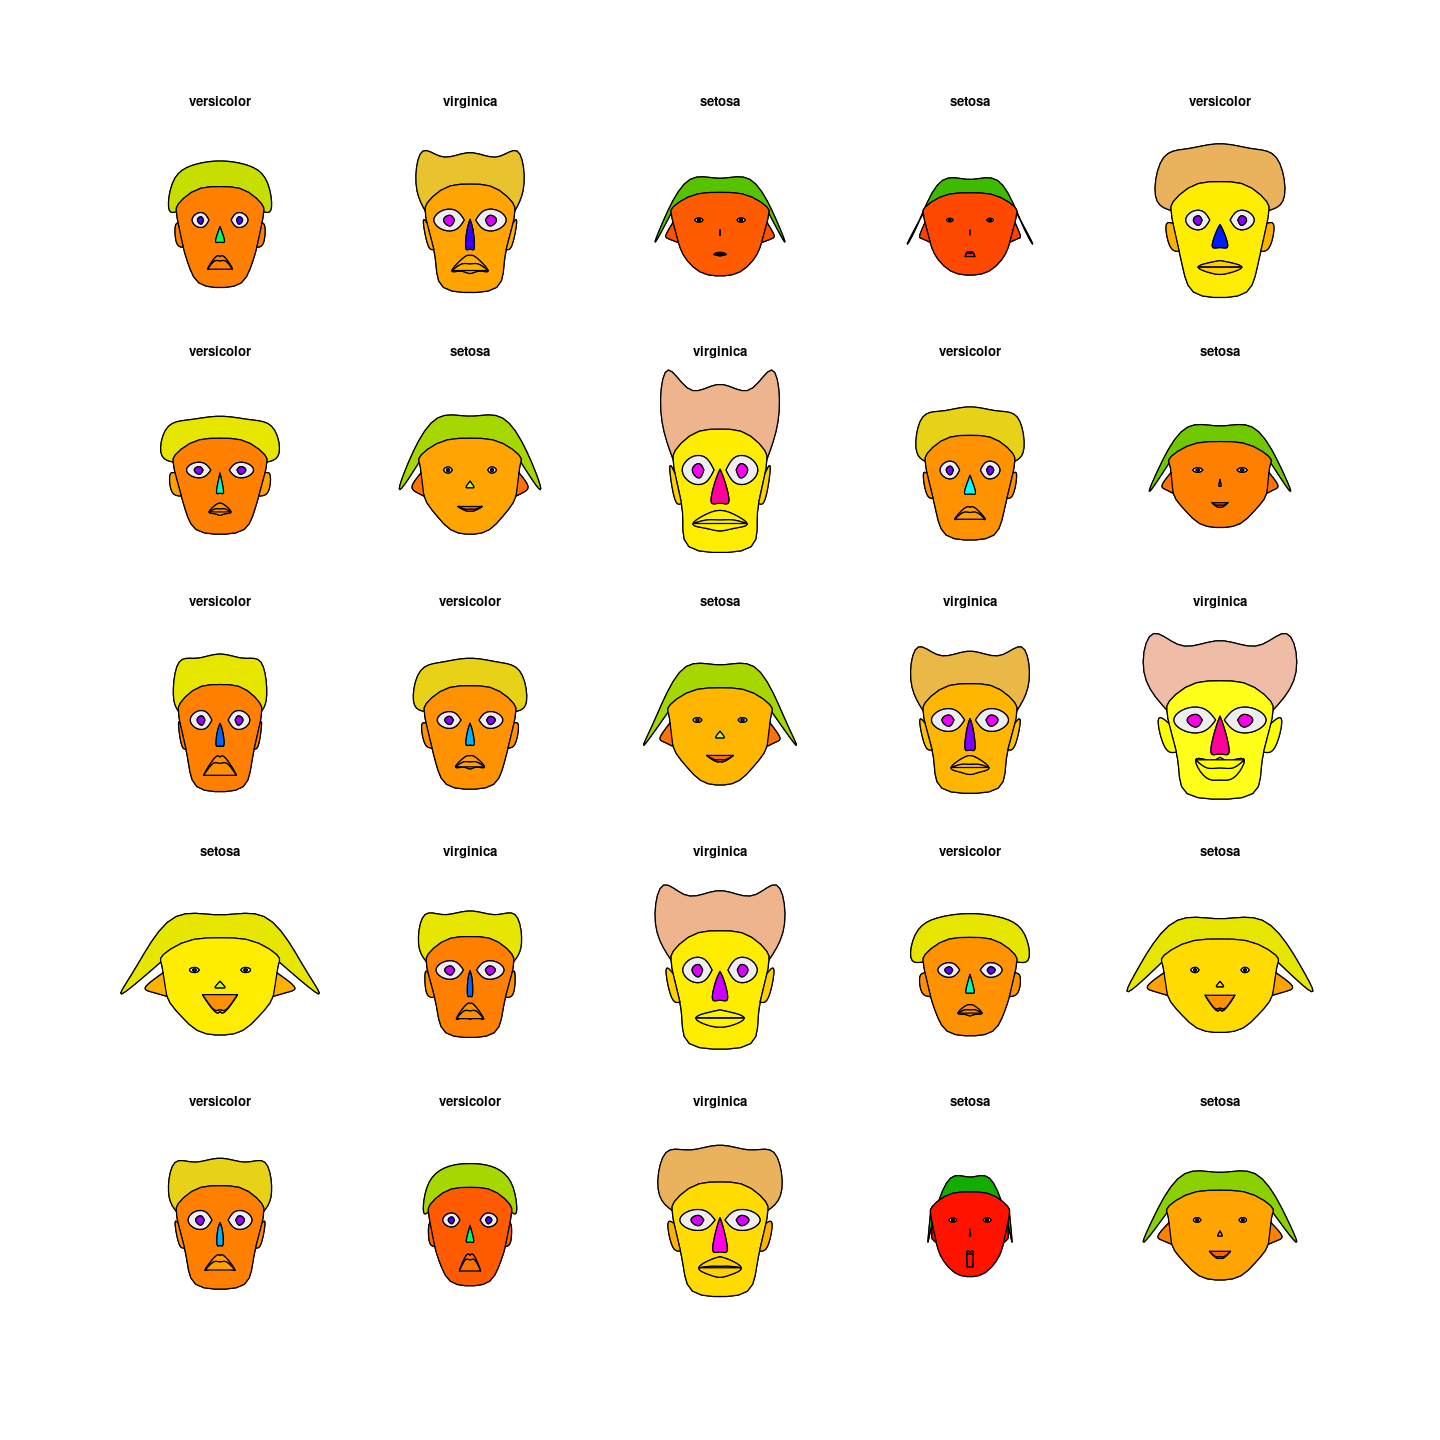

In [86]:
set.seed(1)
sample_rows = sample(1:nrow(iris), 25)

isample = iris[sample_rows,]
labels = as.character(isample$Species)
isample$Species <- NULL

plot.size(12, 12)
faces(isample, labels = labels, print.info=F, cex=1)